In [64]:
import numpy as np
import matplotlib.pyplot as plt


In [90]:
class MultilayerPerceptron:
    def __init__(self, input_size, hidden_layer_sizes, output_size, activation_functions_type):
        self.input_size = input_size
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_size = output_size
        self.af_type = activation_functions_type
        self.layers = len(hidden_layer_sizes) + 1 

        self.weights = [np.random.random((input_size, hidden_layer_sizes[0]))]
        self.biases = [np.random.random((1, hidden_layer_sizes[0]))]

        for i in range(1, self.layers-1):
            self.weights.append(np.random.random((hidden_layer_sizes[i - 1], hidden_layer_sizes[i])))
            self.biases.append(np.random.random((1, hidden_layer_sizes[i])))
        self.weights.append(np.random.random((hidden_layer_sizes[self.layers-2], output_size)))
        self.biases.append(np.random.random((1, output_size)))
    
    def activation_function(self, x, type = 'sigmoid'):
        if type == 'sigmoid':
            return 2 / (1 + np.exp(-x)) - 1
        elif type == 'linear':
            return x
    def activation_function_derivative(self, x, type = 'sigmoid'):
        if type == 'sigmoid':
            return (1 - self.activation_function(x, type = 'sigmoid') ** 2) / 2
        elif type == 'linear':
            return 1
    # def sigmoid(self, x):
    #     return 2 / (1 + np.exp(-x)) - 1

    # def sigmoid_derivative(self, x):
    #     return (1 - self.sigmoid(x) ** 2) / 2

    def forward(self, x):
        layer_output = x

        for i in range(self.layers):
            layer_input = layer_output @ self.weights[i] + self.biases[i]
            layer_output = self.activation_function(layer_input, self.af_type[i-1])

        return layer_output

    def gradient_calculation(self, x, y):
        layer_outputs = [x]
        layer_inputs = []

        # Forward pass
        for i in range(self.layers):
            layer_input = layer_outputs[i] @ self.weights[i] + self.biases[i]
            layer_inputs.append(layer_input)
            layer_output = self.activation_function(layer_input, self.af_type[i-1])
            layer_outputs.append(layer_output)

        # Backpropagation
        error = y - layer_outputs[-1]
        delta = error * self.activation_function_derivative(layer_inputs[-1], self.af_type[-1])
        grads = [{'weights': 0, 'bias': 0} for _ in range(self.layers)]

        for i in range(self.layers - 1, -1, -1):
            grads[i]['weights'] = np.sum(np.expand_dims(delta,1)*np.expand_dims(layer_outputs[i],2),0) #layer_outputs[i].T @ delta
            grads[i]['bias'] = np.sum(delta, axis=0, keepdims=True)

            # grads[i]['weights'] = np.clip(grads[i]['weights'], -1, 1)
            # grads[i]['weights'] = np.clip(grads[i]['bias'], -1, 1)
            if i > 0:
                error = delta @ self.weights[i].T
                delta = error * self.activation_function_derivative(layer_inputs[i - 1], self.af_type[i - 1])

        return grads

    def train(self, x, y, update_step_num=10, learning_rate=0.001):
        for i in range(update_step_num):
            grads = self.gradient_calculation(x, y)

            for j in range(self.layers):
                self.weights[j] += learning_rate * grads[j]['weights']
                self.biases[j] += learning_rate * grads[j]['bias']

In [91]:
Tz = 0.1
z = np.arange(0, 250+Tz, Tz)  

u1 = np.sin(np.pi * z / 25)
u2 = np.ones(int(250 / Tz))
u3 = -1 * np.ones(int(250 / Tz))
u4 = 0.3 * np.sin(np.pi * z / 25) + 0.1 * np.sin(np.pi * z / 32) + 0.6 * np.sin(np.pi * z / 10)
u = np.concatenate((u1, u2, u3, u4))
s = u.shape
T = 1000
z = np.arange(0, 1000 + Tz*2, Tz)
a = 1.2 - 0.2 * np.cos(2 * np.pi * z / T)
b = 1 - 0.4 * np.sin(2 * np.pi * z / T)
c = 1 + 0.4 * np.sin(2 * np.pi * z / T)

Y = np.zeros_like(z)  
x1 = 0
x2 = 0
x3 = 0
x4 = 0
x5 = 0

inputs = []
outputs = []
for i in range(s[0] - 1):
    # Actual System
    x1 = Y[i]
    x4 = u[i]
    Y[i + 1] = (x1 * x2 * x3 * x5 * (x3 - b[i]) + c[i] * x4) / (a[i] + x2 ** 2 + x3 ** 2)
    u_ = np.array([x1, x2, x3, x4, x5])
    inputs.append(u_.tolist())
    outputs.append(Y[i+1].tolist())
    x5 = x4
    x3 = x2
    x2 = x1



In [92]:
# import control as ctrl

# num = [-1,1.9,.95]
# den = [1,-.18,.08,-0.08]

# transfer_function = ctrl.TransferFunction(num, den)

# t = np.linspace(0, 10, 1000)  

# inputs = np.random.normal(0, 1, 1000)*10

# resp = ctrl.forced_response(transfer_function, t, inputs)
# t, outputs, state = resp.time, resp.outputs, resp.states

# inputs = inputs.tolist()
# outputs = outputs.tolist()

In [93]:

inputDelayed1 = np.array([[0,0,0,0,0]] + inputs[0:-1])
inputDelayed2 = np.array([[0,0,0,0,0]]*2 + inputs[0:-2])

# inputDelayed1 = np.array([0] + inputs[0:-1]).reshape([-1,1])
# inputDelayed2 = np.array([0]*2 + inputs[0:-2]).reshape([-1,1])

outputDelayed1 = np.array([0] + outputs[0:-1]).reshape([-1,1])
outputDelayed2 = np.array([0]*2 + outputs[0:-2]).reshape([-1,1])

inputs = np.array(inputs)#.reshape([-1,1])
outputs = np.array(outputs).reshape([-1,1])



x = np.hstack((inputs , inputDelayed1 , inputDelayed2 , outputDelayed1 , outputDelayed2))

In [101]:
hidden_layer_sizes = [1]  
layers_af = ['sigmoid']
model = MultilayerPerceptron(x.shape[1], hidden_layer_sizes, outputs.shape[1], layers_af)

In [102]:
model.train(x, outputs, 1000, 0.001)
yhat = model.forward(x)

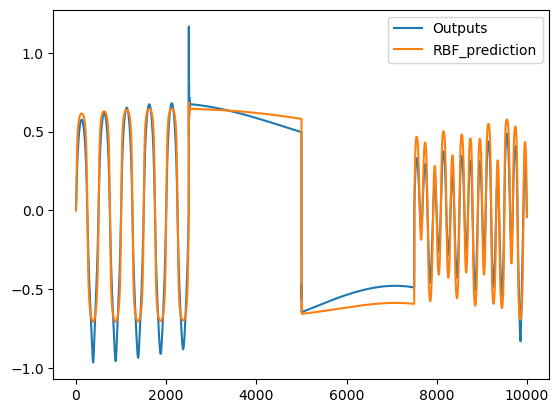

In [103]:
plt.plot(outputs)
plt.plot(yhat)
plt.legend(['Outputs', 'RBF_prediction', 'Perceptron_prediction'])

# Part II

In [ ]:
def integration_with_filter(y_prev, yd, yd_old, count, gain = 1, dt=.1):
    K = (.2)**(1/count**count)
    y_new = y_prev + K * (dt) * (yd + yd_old*gain)/(1+gain)
    return y_new

In [ ]:
import numpy as np

class TwolayerPerceptron:
    def __init__(self, input_size, hidden_layer_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.w1 = np.random.random((input_size, hidden_layer_size))
        self.w2 = np.random.random((hidden_layer_size, output_size))
        self.b1 = np.random.random((1, hidden_layer_size))
        self.b2 = np.random.random((1, output_size))

    def sigmoid(self, x):
        return 2 / (1 + np.exp(-x)) - 1

    def sigmoid_derivative(self, x):
        return (1 - self.sigmoid(x) ** 2) / 2

    def forward(self, x):
        z1 = x@self.w1 + self.b1
        a1 = self.sigmoid(z1)
        z2 = a1@self.w2 + self.b2
        # a2 = self.sigmoid(z2)
        return z2

    def gradient_calculation(self, x, state, A):

        # Forward pass
        z1 = x@self.w1 + self.b1
        a1 = self.sigmoid(z1)
        ghat = a1@self.w2 + self.b2
        t = 0
        dt = .1
        xhat = np.zeros(ghat.shape)
        for i in range(1, xhat.shape[0]):
            t += dt
            count = int(t/dt)
            xhat[i] = integration_with_filter(xhat[i-1], ghat[i]+state.T[i-1]@A, ghat[i-1]+state.T[i-2]@A, count, gain = 1, dt=.1)
            # xhat[i] = integration_with_filter(xhat[i-1], ghat[i]+xhat[i-1]@A, ghat[i-1]+xhat[i-1]@A, count, gain = 1, dt=.1)
        # a2 = self.sigmoid(z2)
        error2 = (state.T-xhat)@np.linalg.pinv(A) #xtilde
        self.history.append(np.mean(error2**2))
        # Backpropagation
        # error2 = z2 - y    #N * 1
        delta2 = error2 * 1#self.sigmoid_derivative(z2)
        # delta 2 is N*1 and a1 N*3
        grad_w2 = np.expand_dims(delta2,1) * np.expand_dims(a1, -1)   #N*1*1  N*3*1
        grad_w2 = np.sum(grad_w2,0)  # 3*1
        grad_b2 = np.sum(delta2, 0, keepdims=True)
        error1 = np.expand_dims(delta2,1) * np.expand_dims(self.w2,0)   #N*1  3*1
        error1 = np.sum(error1, -1)  #N*3
        delta1 = error1 * self.sigmoid_derivative(z1)
        # delta1 is N*3 and x is N*2  
        grad_w1 = np.expand_dims(delta1,1) * np.expand_dims(x,-1) # N*2*3
        grad_w1 = np.sum(grad_w1, 0)
        grad_b1 = np.sum(delta1, 0, keepdims=True)
                
        return grad_w1, grad_w2, grad_b1, grad_b2

    def train(self, x, state, A, update_step_num=100, learning_rate=0.001):
        self.history = []
        for i in range(update_step_num):
            grad_w1, grad_w2, grad_b1, grad_b2 = self.gradient_calculation(x, state, A)

            self.w1 -= learning_rate * grad_w1
            self.w2 -= learning_rate * grad_w2
            self.b1 -= learning_rate * grad_b1
            self.b2 -= learning_rate * grad_b2

In [ ]:
import control as ctrl

A, B, C, D = np.array([[-50,0],[1,0]]), np.array([[1,0]]).T, np.array([0, 2000]), 0
num = [40]
den = [0.02, 1, 0]

transfer_function = ctrl.TransferFunction(num, den)

t = np.linspace(0, 10, 1000)  

input_signal = np.sin(t)

resp = ctrl.forced_response(transfer_function, t, input_signal)
t, output, state = resp.time, resp.outputs, resp.states

input_signal = input_signal.reshape([-1,1])
output = output.reshape([-1,1])

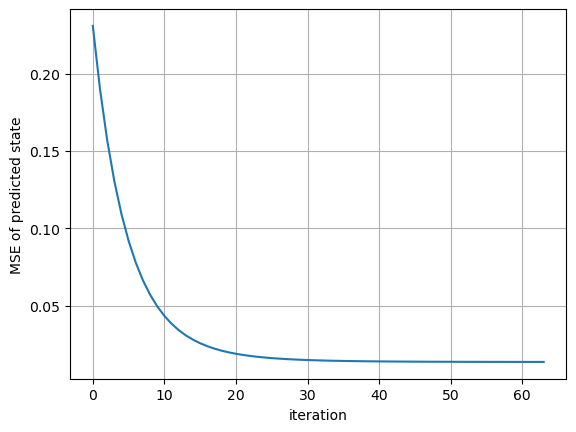

In [ ]:
model3 = TwolayerPerceptron(input_signal.shape[1],1,2)
model3.train(input_signal, state, A, 64, 0.0001)
# ghat = model3.forward(input_signal)
plt.plot(model3.history)
plt.xlabel('iteration')
plt.ylabel('MSE of predicted state')
plt.grid('on')

In [ ]:
ghat = model3.forward(input_signal)

In [ ]:
t = 0
dt = .1
xhat = np.zeros(ghat.shape)
for i in range(1, xhat.shape[0]):
    t += dt
    count = int(t/dt)
    xhat[i] = integration_with_filter(xhat[i-1], ghat[i]+state.T[i-1]@A, ghat[i-1]+state.T[i-2]@A, count, gain = 1, dt=.1)

In [ ]:
xhat

array([[0.00000000e+00, 0.00000000e+00],
       [9.41255667e-03, 1.58833202e-02],
       [2.19649226e-02, 6.90641462e-02],
       ...,
       [2.49377696e+00, 8.08719493e+01],
       [2.56611392e+00, 8.09455464e+01],
       [2.63928861e+00, 8.10190507e+01]])

In [ ]:
state.T

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 4.26903540e-05,  1.48179191e-07],
       [ 1.47398212e-04,  1.05988044e-06],
       ...,
       [-1.01982180e-02,  3.71995348e-02],
       [-1.03698734e-02,  3.70965906e-02],
       [-1.05404898e-02,  3.69919333e-02]])